**What affects betting over/unders lines?**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("NBA_2021_2022_Bet_Outcomes.csv")

In [3]:
df["Close"] = pd.to_numeric(df["Close"], errors="coerce")

home_team_score = df["Final"]
away_team_score = df["Final"].shift(-1)  # Shifting to align away team scores

In [4]:
# Calculate total score
total_score = home_team_score + away_team_score

From the cv file, we have gathered all the home team and away team total scores as well as the total over under scores from each game for comparison to see how accurate the over/under line are that are set by the betting odds makers

In [5]:
over_under = df.loc[df["Close"].gt(100), "Close"]
over_under = over_under.repeat(2)[:len(total_score)]

total_score = total_score.iloc[:-1]
over_under = over_under.iloc[:-1]

print("Total Score:")
print(total_score)
print("\nOver/Under Closed:")
print(over_under)

Total Score:
0       231.0
1       248.0
2       235.0
3       236.0
4       245.0
        ...  
2640    204.0
2641    191.0
2642    198.0
2643    207.0
2644    193.0
Name: Final, Length: 2645, dtype: float64

Over/Under Closed:
0       233.5
0       233.5
2       226.5
2       226.5
5       223.0
        ...  
2640    213.5
2640    213.5
2642    211.0
2642    211.0
2644    211.5
Name: Close, Length: 2645, dtype: float64


In [6]:
print("Length of total_score:", len(total_score))
print("Length of over_under:", len(over_under))

# Check for NaN values
nan_indices_total_score = np.isnan(total_score)
nan_indices_over_under = np.isnan(over_under)
print("NaN values in total_score:", total_score[nan_indices_total_score])
print("NaN values in over_under:", over_under[nan_indices_over_under])

# Check for duplicate games
print("Unique games in total_score:", len(total_score.index.unique()))
print("Unique games in over_under:", len(over_under.index.unique()))

Length of total_score: 2645
Length of over_under: 2645
NaN values in total_score: Series([], Name: Final, dtype: float64)
NaN values in over_under: Series([], Name: Close, dtype: float64)
Unique games in total_score: 2645
Unique games in over_under: 1323


Length of over_under: 2645


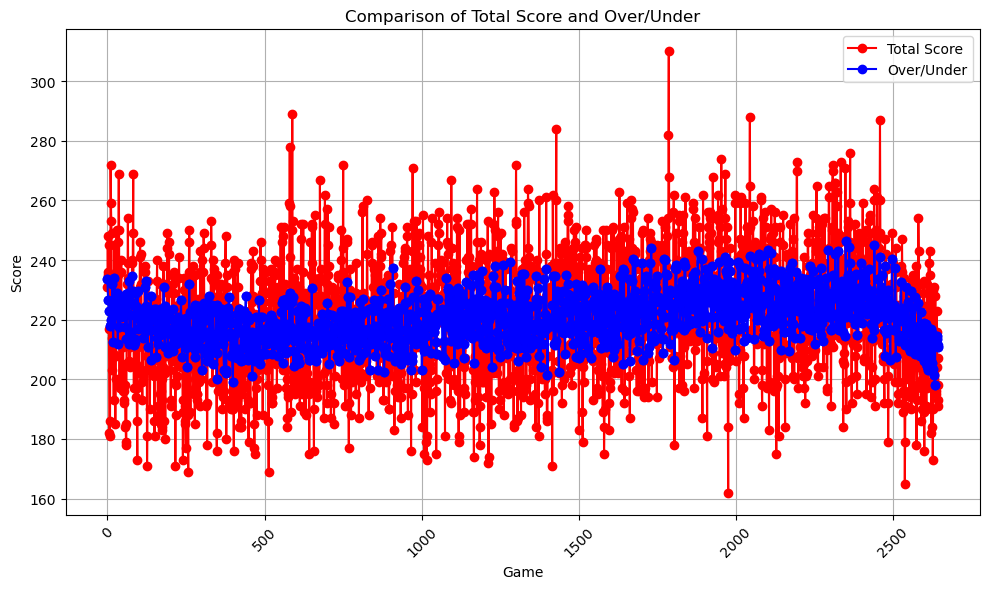

In [7]:
print("Length of over_under:", len(over_under))
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(total_score.index, total_score, marker='o', linestyle='-', color='r', label="Total Score")
ax.plot(over_under.index, over_under, marker='o', linestyle='-', color='b', label="Over/Under")
ax.set_xlabel("Game")
ax.set_ylabel("Score")
ax.set_title("Comparison of Total Score and Over/Under")
ax.legend()
ax.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

As we can see here, this is a mapping of all the over unders for every game in the season and the the total score of the same game. Clearly there is quite a big discrepancy, and what seems like a big loophole to make money. 

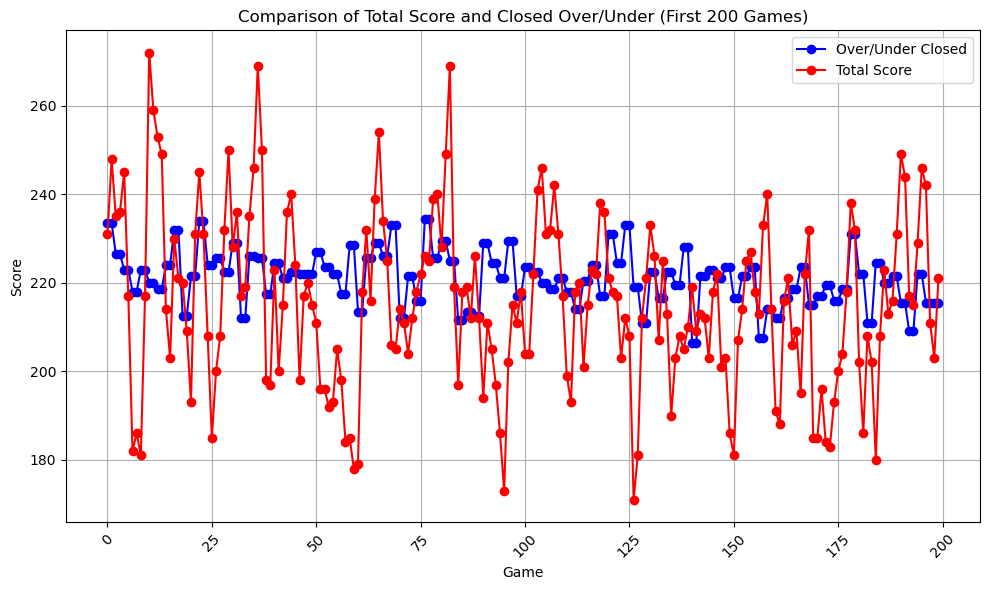

In [63]:
over_under = over_under.reset_index(drop=True)
total_score = total_score.reset_index(drop=True)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(over_under[:200], marker='o', linestyle='-', color='b', label="Over/Under Closed")
ax.plot(total_score[:200], marker='o', linestyle='-', color='r', label="Total Score")
ax.set_xlabel("Game")
ax.set_ylabel("Score")
ax.set_title("Comparison of Total Score and Closed Over/Under (First 200 Games)")
ax.legend()
ax.grid(True)  # Add gridlines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

A more zoomed in look at just the first twenty games of the season, and it still seems like the odds makers were not very accurate making the over/under lines. 

Length of total_score: 2645
Length of over_under: 2645
Indices where total_score and over_under mismatch:
[]
Length of total_score - over_under: 2645
Length of accuracy: 2645
Mismatched values of total_score:
Series([], Name: Final, dtype: float64)

Mismatched values of over_under:
Series([], Name: Close, dtype: float64)


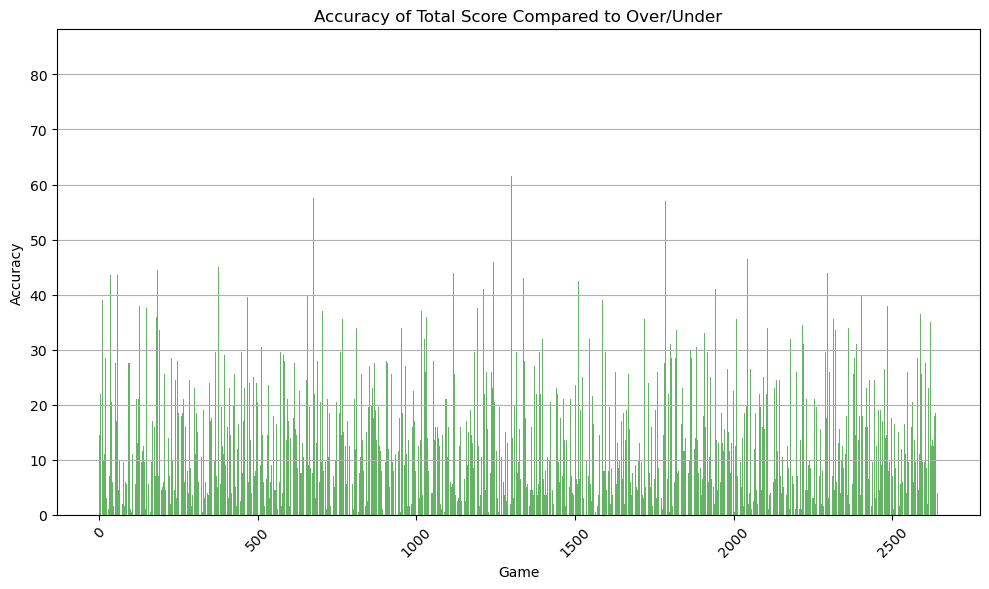

In [13]:
#over_under = over_under.reset_index(drop=True)
#total_score = total_score.reset_index(drop=True)
over_under = over_under.reset_index(drop=True)
over_under = over_under.reindex(total_score.index)
accuracy = np.abs(total_score - over_under)
print("Length of total_score:", len(total_score))
print("Length of over_under:", len(over_under))
print("Indices where total_score and over_under mismatch:")
mismatch_indices = np.where(total_score.index != over_under.index)[0]
print(mismatch_indices)
print("Length of total_score - over_under:", len(total_score - over_under))
print("Length of accuracy:", len(accuracy))
print("Mismatched values of total_score:")
print(total_score.iloc[mismatch_indices])

print("\nMismatched values of over_under:")
print(over_under.iloc[mismatch_indices])

# Create a bar plot for accuracy
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(total_score.index, accuracy, color='g', alpha=0.6)
ax.set_xlabel("Game")
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy of Total Score Compared to Over/Under")
ax.grid(axis='y')  # Add gridlines
ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import numpy as np

In [15]:
# Assuming X contains your features and accuracy is your target variable
X = np.arange(len(over_under)).reshape(-1, 1)
print("Length of over_under:", len(over_under))
print("Length of accuracy:", len(accuracy))
X_train, X_test, y_train, y_test = train_test_split(X, accuracy, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Length of over_under: 2645
Length of accuracy: 2645
Mean Squared Error: 115.77951010904985


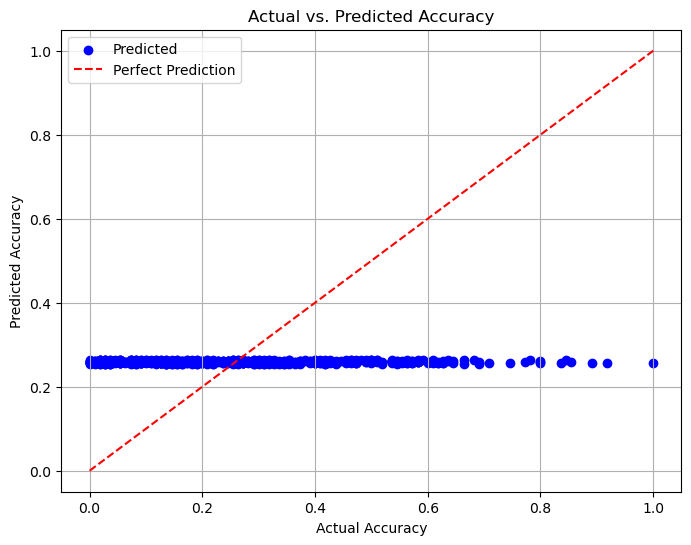

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Convert pandas Series to numpy array
y_test_array = y_test.to_numpy()

# Reshape the array
y_test_reshaped = y_test_array.reshape(-1, 1)

scaler = MinMaxScaler()
y_test_scaled = scaler.fit_transform(y_test_reshaped)
predictions_scaled = scaler.transform(predictions.reshape(-1, 1))

plt.figure(figsize=(8, 6))
plt.scatter(y_test_scaled, predictions_scaled, color='blue', label='Predicted')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Accuracy')
plt.ylabel('Predicted Accuracy')
plt.title('Actual vs. Predicted Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
X = np.arange(len(over_under)).reshape(-1, 1)  # Using game index as feature
y = over_under

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train R^2:", r2_train)
print("Test R^2:", r2_test)

Train MSE: 65.84381647557592
Test MSE: 66.97298177735271
Train R^2: 0.10664732116347397
Test R^2: 0.0593234437920066


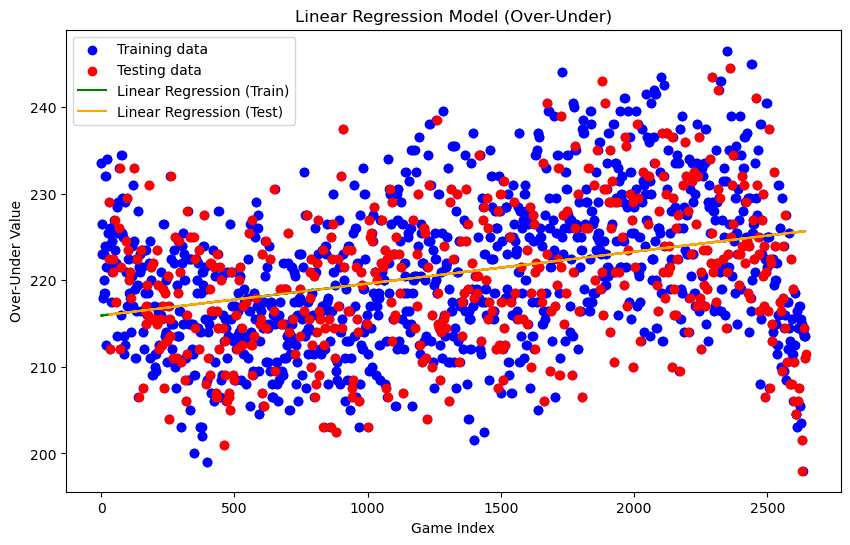

In [22]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_train, y_pred_train, color='green', label='Linear Regression (Train)')
plt.plot(X_test, y_pred_test, color='orange', label='Linear Regression (Test)')
plt.title('Linear Regression Model (Over-Under)')
plt.xlabel('Game Index')
plt.ylabel('Over-Under Value')
plt.legend()
plt.show()